# This notebook helps you check and visualise your implementaions



In [1]:
# Reset the variables in the workspace
%reset -f 
# Import required libraries
import os, time
from skimage import io, img_as_float32
from skimage.transform import rescale
import numpy as np
from numpy import pi, exp, sqrt
%matplotlib inline
import matplotlib.pyplot as plt
import cv2

plt.rcParams['figure.figsize'] = [9.5, 6]   # width X height in inches

from A1_template import *  # importing your implemented functions


# Testing the spatial filtering functions

### Using an identity filter

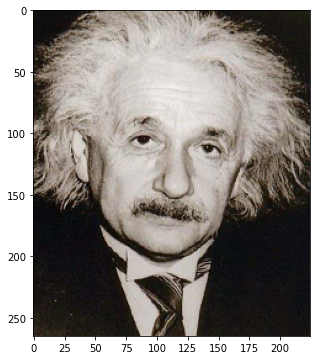

In [2]:
#Identity/impulse filter 
img_einstein = img_as_float32(io.imread('./images/4a_einstein.bmp'))
identity_filter = np.asarray([[0, 0, 0], [0, 1, 0], [0, 0, 0]], dtype=np.float32)  #3x3 identity filter
identiy_image = spatial_dom_filter(img_einstein, identity_filter)
plt.imshow(identiy_image, cmap='gray')   
plt.show() # should plot the input image as it is without any changes

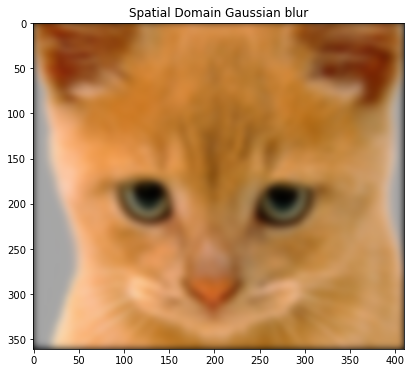

In [3]:
img_cat = img_as_float32(io.imread('./images/1b_cat.bmp'))
spatial_sigma = 4              # standard deviation of the gaussian kernel in pixels
spatial = gaussLP_2D_space(spatial_sigma, 1)
gauss_LPspace_img = spatial_dom_filter(img_cat, spatial)

fig, ax = plt.subplots()
ax.imshow(gauss_LPspace_img)
ax.set_title('Spatial Domain Gaussian blur')
plt.show()

###### You can try testing your implementaion against other filters as well

### Testing spatial domain functions with a grayscale image

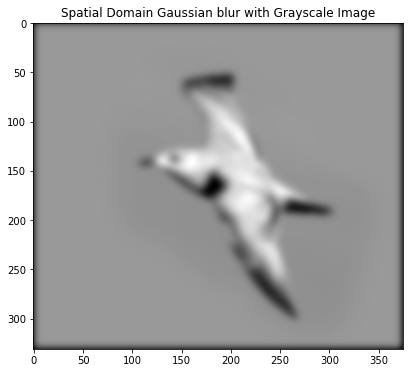

In [4]:
img_bird_grayscale = cv2.imread('./images/3b_bird.bmp', 0)
spatial_grayscale = gaussLP_2D_space(spatial_sigma, 1)
gauss_LPspace_img_grayscale = spatial_dom_filter(img_bird_grayscale, spatial_grayscale)

fig, ax = plt.subplots()
ax.imshow(gauss_LPspace_img_grayscale, cmap='gray')
ax.set_title('Spatial Domain Gaussian blur with Grayscale Image')
plt.show()

# Testing the frequency domain filter functions


### Gaussian low pass filtering in the frequency domain
set the cutoff frequency vaue below


c:\Users\jgibbo10\OneDrive - University of Warwick\Year 3\WM391 - Indst Vision and Processing\Assignment 1\Fundamental-Image-Processing\A1_template.py:179: ComplexWarning: Casting complex values to real discards the imaginary part
  filtered_image[:,:,z] = np.fft.ifft2(np.multiply(freq_channel, filter))


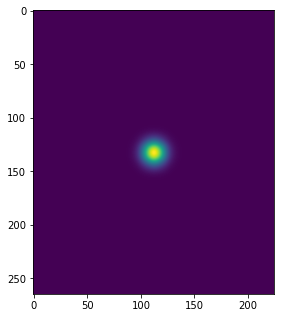

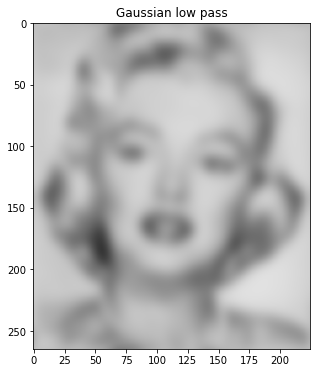

In [5]:
cutoff_freq = 5

img_marilyn = img_as_float32(io.imread('./images/4b_marilyn.bmp'))


k_size = img_marilyn.shape[:2]

filter = gaussLP_2D_freq(cutoff_freq, (k_size), 1)
gauss_LP_image = freqency_dom_filter(img_marilyn, filter)

fig, ax = plt.subplots()
ax.imshow(gauss_LP_image)
ax.set_title('Gaussian low pass')
plt.show()

### Testing the frequency domain functions with a grayscale image

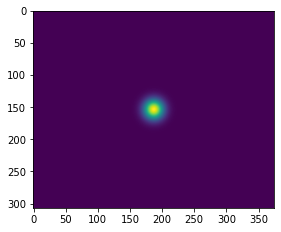

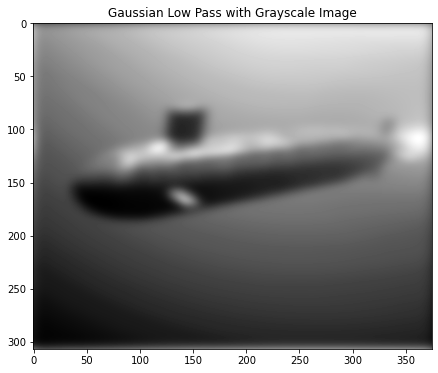

In [6]:
img_submarine_grayscale = cv2.imread('./images/5a_submarine.bmp', 0)

k_size = img_submarine_grayscale.shape[:2]

filter_grayscale = gaussLP_2D_freq(cutoff_freq, (k_size), 1)
gauss_LP_image_grayscale = freqency_dom_filter(img_submarine_grayscale, filter_grayscale)

fig, ax = plt.subplots()
ax.imshow(gauss_LP_image_grayscale, cmap='gray')
ax.set_title('Gaussian Low Pass with Grayscale Image')
plt.show()

# Testing the effect of padding images for frequency domain filtering

In [7]:
# Modify the imputs to the existing gaussian filters and freqency_dom_filter functions
filter_pad = # padded filter of appropriate size
image_pad = # appropriately padded image
result_padded = freqency_dom_filter(image_pad,filter_pad)
result_padded = result_padded[:image.shape[0],:image.shape[1],:]


fig, ax = plt.subplots(1,3, figsize=(12,4))
ax[0].imshow(gauss_LP_image)
ax[1].imshow(result_padded)
ax[2].imshow(np.abs(gauss_LP_image - result_padded))

ax[0].set_title('Gaussian low pass')
ax[1].set_title('Gaussian low pass with padding')
ax[2].set_title('Absolute intensity difference')
plt.show()

SyntaxError: invalid syntax (2533927747.py, line 2)

# Testing the computational difference between spatial and frequency domain

Test for cutoff frequency from 5 to 50

In [ ]:
cutoff_freq =15
spatial_sigma = image.shape[0]/(2*pi*cutoff_freq)  # a very rough spatial equivalent, can you find a better approximation?

t1= time.perf_counter()

spatial = gaussLP_2D_space(spatial_sigma, 1)
spatial_blur_img = spatial_dom_filter(image, spatial)

t2= time.perf_counter()

print('Computational time in Frequency domain is {}s'.format(t2-t1))


t1 = time.perf_counter()

######Modify the below section according to your choice of padding method####
filter_pad = # your code here
filtered_image_pad = # your code here
#############################################################################
t2 = time.perf_counter()
      
print('Computational time in Space domain  is {}s'.format(t2-t1))

fig, ax = plt.subplots(1,3)
ax[0].imshow(spatial_blur_img)
ax[1].imshow(filtered_image_pad)
ax[2].imshow(abs(filtered_image_pad - spatial_blur_img))

ax[0].set_title('Gaussian Spatial')
ax[1].set_title('Gaussian Frequency')
ax[2].set_title('Absolute intensity difference')
plt.show()
